# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [1]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    arr = np.loadtxt(data_path, delimiter=",", dtype=float)
    return arr

load_data("spice_locations.txt")

array([[-2.12729941e+00,  1.75357153e+00],
       [-3.40030291e-01, -6.70757901e-03],
       [-3.21990680e+00, -2.22002740e+00],
       [-3.70958194e+00,  1.33088073e+00],
       [-9.94424941e-01,  5.40362889e-01],
       [-3.89707753e+00,  1.84954926e+00],
       [ 1.62213204e-01, -1.93830445e+00],
       [-3.09087516e+00, -2.08297745e+00],
       [-2.47878879e+00, -3.76217842e-01],
       [-1.84027491e+00, -1.54385430e+00],
       [-9.40735526e-01, -2.30253070e+00],
       [-2.53927676e+00, -1.16819078e+00],
       [-1.71965008e+00,  9.25879807e-01],
       [-3.00163109e+00, -4.28827808e-01],
       [-1.03792716e+00, -2.76774794e+00],
       [-9.62275740e-01, -2.14737938e+00],
       [-3.67474204e+00,  1.74442769e+00],
       [ 8.28160165e-01,  1.04198674e+00],
       [-2.47693115e+00, -2.51163943e+00],
       [-5.78834867e-01, -7.99237531e-01],
       [-3.38980883e+00, -5.24115449e-01],
       [-3.82805739e+00,  1.54660201e+00],
       [-2.70610009e+00,  3.12611422e-01],
       [-2.

In [3]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is not None:
        return init_centers

    N = data.shape[0]
    choices = np.random.randint(N, size=K)

    init_centers = data[choices]
    return init_centers
    
initialise_centers(load_data("spice_locations.txt"), 4)

array([[-3.00163109, -0.42882781],
       [ 3.14399083,  3.38489955],
       [-0.94073553, -2.3025307 ],
       [ 3.40467255,  5.71348042]])

In [4]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    N = data.shape[0]
    return np.ones(N)

initialise_labels(load_data("spice_locations.txt"))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    arr = []
    for d in data:
        miniarr = []
        for c in centers:
            miniarr.append(((d[0] - c[0]) ** 2 + (d[1] - c[1]) ** 2) ** 0.5)
        arr.append(miniarr)
    
    return np.array(arr)

_data = load_data("spice_locations.txt")
_distances = calculate_distances(_data, initialise_centers(_data, 4))
_distances

array([[ 1.65990354,  2.95066439,  4.0356003 ,  3.95570301],
       [ 0.85294692,  2.48711243,  3.79552947,  3.44645384],
       [ 3.54577552,  1.25284377,  0.39239161,  0.1882335 ],
       [ 2.82789603,  2.75952399,  3.35441402,  3.46947053],
       [ 0.        ,  2.30341546,  3.62290531,  3.35812717],
       [ 3.18423633,  3.30913552,  3.88450281,  4.01431546],
       [ 2.73525201,  2.80911428,  3.72064959,  3.25630376],
       [ 3.35812717,  1.06822069,  0.4708812 ,  0.        ],
       [ 1.74455045,  0.79427951,  1.9662147 ,  1.81319555],
       [ 2.24931622,  0.79355319,  1.78207382,  1.36185711],
       [ 2.84340052,  1.96011763,  2.6320007 ,  2.16131999],
       [ 2.30341546,  0.        ,  1.32762188,  1.06822069],
       [ 0.82132502,  2.24875955,  3.47225328,  3.30658135],
       [ 2.22894754,  0.87202588,  1.68556625,  1.65655533],
       [ 3.30839684,  2.19377157,  2.62819997,  2.16414097],
       [ 2.68793454,  1.85627113,  2.59838166,  2.12957346],
       [ 2.93834507,  3.

In [6]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = []
    for ds in distances:
        idx = 0
        for i, d in enumerate(ds):
            if d < ds[idx]:
                idx = i
        labels.append(idx)
    
    return np.array(labels)

_labels = update_labels(_distances)
_labels

array([0, 0, 3, 1, 0, 0, 0, 3, 1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 3, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
   arr = []
   for i in range(K):
      assigned = data[labels == i]
      arr.append([assigned[:, 0].mean(), assigned[:, 1].mean()])
   
   return np.array(arr)

update_centers(_data, _labels, 4)

array([[ 2.9440177 ,  4.03883352],
       [-2.42536869, -0.64803414],
       [-3.66570052, -1.69671702],
       [-2.45641007, -2.39559805]])

In [8]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return all(labels1 == labels2)

print(check_termination(np.array([1, 2]), np.array([1, 2])))
print(check_termination(np.array([1, 2]), np.array([1, 3])))

True
False


In [9]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [10]:
### TODO 7
def visualise(data_path, labels, centers):
    

    # Scatter plot of the data points
    data = load_data(data_path=data_path)
    K = centers.shape[0]
    for i in range(K):
        plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1])
        plt.scatter([centers[i, 0]], [centers[i, 1]], marker='x')

    ### Set title as 'K-means clustering'
    plt.title("K-means clustering")

    ### Set xlabel as 'Longitude'
    plt.xlabel("Longitude")

    ### Set ylabel as 'Latitude'
    plt.ylabel("Latitude")

    ### Save the plot as 'kmeans.png'
    plt.savefig("kmeans.png")

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0008192062377929688


<module 'matplotlib.pyplot' from '/home/shawn/Work/iitb/events/data_davinci/repo/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

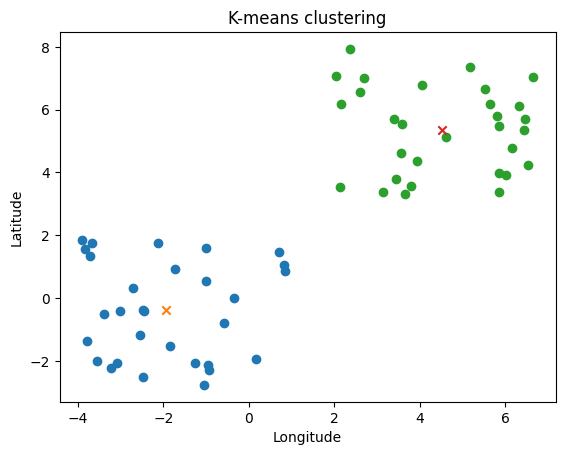

In [11]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)